In [1]:
# you should fill in the functions in this file,
# do NOT change the name, input and output of these functions

import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# first function to fill, compute distance matrix using loops
def compute_distance_naive(X):
    N = X.shape[0]      # num of rows
    D = X[0].shape[0]   # num of cols


    M = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            xi = X[i,:]      # (1 x D)
            xj = X[j,:]
            '''
            Euclidean Distance is defined by 
            || x_i - x_j || = sqrt[ SUM{(xi - xj)^2} ]
            '''
            dist = np.sqrt(np.sum((xi - xj)**2))     # you have to change it to distance between xi and xj
            M[i,j] = dist

    return M

# second function to fill, compute distance matrix without loops
def compute_distance_smart(X):
    N = X.shape[0]  # num of rows
    D = X[0].shape[0]  # num of cols
    
    # use X to create M
    M = np.zeros([N, N]) 

    # compute the sum of squares for each row (i.e., ||x_i||^2 for all i)
    X_squared = np.sum(X**2, axis=1).reshape(-1, 1)  # Shape becomes (N, 1)
    
    # use Euclidean distance formula without loops
    # ||x_i - x_j||^2 = ||x_i||^2 + ||x_j||^2 - 2 * x_i * x_j
    M = X_squared + X_squared.T - ( 2 * np.dot( X, X.T ) )
    
    # take the square root to get the actual Euclidean distance
    # take max against zero to avoid numerical instability
    M = np.sqrt(np.maximum(M,0))

    return M

# third function to fill, compute correlation matrix using loops
def compute_correlation_naive(X):
    N = X.shape[0]  # num of rows
    D = X[0].shape[0]  # num of cols

    # use X to create M
    M = np.zeros([D, D])

    # create a vector to store standard deviations 
    sigmas = np.zeros(D)

    for i in range(D):
        for j in range(D):
            xi = X[:, i]
            xj = X[:, j]
            
            # calulate the mean of the column vectors, calculated across N rows 
            mui = (1 / N) * np.sum(xi)
            muj = (1 / N) * np.sum(xj)
            
            # Compute the covariance s_ij
            M[i][j] = (1 / (N - 1)) * np.sum((xi - mui) * (xj - muj))
            
            # store the standard deviations in a vector
            if i == j:
                sigmas[i] = np.sqrt( M[i][j] )

    # convert the covariance matrix to the correlation matrix
    for i in range(D):
        for j in range(D):
            if sigmas[i] != 0 and sigmas[j] != 0:
                M[i][j] /= (sigmas[i] * sigmas[j])
                
    return M

# fourth function to fill, compute correlation matrix without loops
def compute_correlation_smart(X):
    N = X.shape[0]  # num of rows
    D = X[0].shape[0]  # num of cols
    
    # compute the sum along the columns
    # gives column vector shape (D,)
    mu = (1/N)*np.sum(X, axis = 0)
    
    # center the matrix
    X_centered = X - mu
    # compute covariance matrix
    S = (1 / (N-1)) * np.dot(X_centered.T, X_centered)
    
    # store standard deviations
    stds = np.sqrt(np.diag(S))
    
    # create the correlation matrix, set undefined correlations to NaN
    with np.errstate(divide='ignore', invalid='ignore'):
        M = S / np.outer(stds, stds)
        M[np.isnan(M)] = np.nan  # Set any NaNs in the matrix

    return M

In [ ]:
def main():
    print('starting comparing distance computation .....')
    np.random.seed(100)
    params = range(10,141,10)   # different param setting
    nparams = len(params)       # number of different parameters

    perf_dist_loop = np.zeros([10,nparams])  # 10 trials = 10 rows, each parameter is a column
    perf_dist_cool = np.zeros([10,nparams])
    perf_corr_loop = np.zeros([10,nparams])  # 10 trials = 10 rows, each parameter is a column
    perf_corr_cool = np.zeros([10,nparams])

    counter = 0

    for ncols in params:
        nrows = ncols * 10

        print( "matrix dimensions: ", nrows, ncols )

        for i in range(10):
            X = np.random.rand(nrows, ncols)   # random matrix

            # compute distance matrices
            st = time.time()
            dist_loop = compute_distance_naive(X)
            et = time.time()
            perf_dist_loop[i,counter] = et - st              # time difference

            st = time.time()
            dist_cool = compute_distance_smart(X)
            et = time.time()
            perf_dist_cool[i,counter] = et - st

            assert np.allclose(dist_loop, dist_cool, atol=1e-06) # check if the two computed matrices are identical all the time

#             compute correlation matrices
            st = time.time()
            corr_loop = compute_correlation_naive(X)
            et = time.time()
            perf_corr_loop[i,counter] = et - st              # time difference
 
            st = time.time()
            corr_cool = compute_correlation_smart(X)
            et = time.time()
            perf_corr_cool[i,counter] = et - st
 
            assert np.allclose(corr_loop, corr_cool, atol=1e-06) # check if the two computed matrices are identical all the time
 
        counter = counter + 1
 
    mean_dist_loop = np.mean(perf_dist_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
    mean_dist_cool = np.mean(perf_dist_cool, axis = 0)
    std_dist_loop = np.std(perf_dist_loop, axis = 0)      # standard deviation
    std_dist_cool = np.std(perf_dist_cool, axis = 0)
 
    plt.figure(1)
    plt.errorbar(params, mean_dist_loop[0:nparams], yerr=std_dist_loop[0:nparams], color='red',label = 'Loop Solution for Distance Comp')
    plt.errorbar(params, mean_dist_cool[0:nparams], yerr=std_dist_cool[0:nparams], color='blue', label = 'Matrix Solution for Distance Comp')
    plt.xlabel('Number of Cols of the Matrix')
    plt.ylabel('Running Time (Seconds)')
    plt.title('Comparing Distance Computation Methods')
    plt.legend()
    plt.savefig('CompareDistanceCompFig.pdf')
    # plt.show()    # uncomment this if you want to see it right way
    print("result is written to CompareDistanceCompFig.pdf")
 
    mean_corr_loop = np.mean(perf_corr_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
    mean_corr_cool = np.mean(perf_corr_cool, axis = 0)
    std_corr_loop = np.std(perf_corr_loop, axis = 0)      # standard deviation
    std_corr_cool = np.std(perf_corr_cool, axis = 0)
 
    plt.figure(2)
    plt.errorbar(params, mean_corr_loop[0:nparams], yerr=std_corr_loop[0:nparams], color='red',label = 'Loop Solution for Correlation Comp')
    plt.errorbar(params, mean_corr_cool[0:nparams], yerr=std_corr_cool[0:nparams], color='blue', label = 'Matrix Solution for Correlation Comp')
    plt.xlabel('Number of Cols of the Matrix')
    plt.ylabel('Running Time (Seconds)')
    plt.title('Comparing Correlation Computation Methods')
    plt.legend()
    plt.savefig('CompareCorrelationCompFig.pdf')
    plt.show()    # uncomment this if you want to see it right way
    print("result is written to CompareCorrelationCompFig.pdf")
 
if __name__ == "__main__": main()

In [3]:
from sklearn import datasets
import pandas as pd

iris_data   = datasets.load_iris()
bc_data     = datasets.load_breast_cancer()
digits_data = datasets.load_digits()

# store in numpy arrays
iris_mat = iris_data.data
bc_mat = bc_data.data
digits_mat = digits_data.data

In [4]:
def time_comp(function, matrix):
    start = time.time()
    _ = function(matrix)
    end = time.time()
    return end-start
    

def compute_dist_corr(mat1, mat2, mat3):
    '''
    A function to compare the computation times for 
    distance and correlation matrices for three 2D
    sets of data. 
    
    Arguments:
        mat1: the first 2D matrix (eg Iris data from sklearn)
        mat2: the second 2D matrix
        mat3: the third 2D matrix
        
    Return:
        results: a 3 x 4 matrix where the rows represent the 
        data sets, and the columns represent the naive and smart
        computation times (in seconds) for the distance matrix and the 
        correlation matrix, respectively 
        
        eg 
        
                        naive dist  smart dist  naive corr  smart corr
        iris          |    8            0.25        ...        ...     |        
        digits        |    4            0.1         ...        ...     |
        breast cancer |    9           0.003        ...        ...     |
    '''
    
    # Initialize results matrix (3 datasets, 4 metrics)
    results = np.zeros((3, 4))
    
    # Naive distance matrix computation
    mat1_dist_loop_time = time_comp(compute_distance_naive, mat1)
    mat2_dist_loop_time = time_comp(compute_distance_naive, mat2)
    mat3_dist_loop_time = time_comp(compute_distance_naive, mat3)
    
    # Smart distance matrix computation
    mat1_dist_smart_time = time_comp(compute_distance_smart, mat1)
    mat2_dist_smart_time = time_comp(compute_distance_smart, mat2)
    mat3_dist_smart_time = time_comp(compute_distance_smart, mat3)
    
    # Naive correlation matrix computation
    mat1_corr_loop_time = time_comp(compute_correlation_naive, mat1)
    mat2_corr_loop_time = time_comp(compute_correlation_naive, mat2)
    mat3_corr_loop_time = time_comp(compute_correlation_naive, mat3)
    
    # Smart correlation matrix computation
    mat1_corr_smart_time = time_comp(compute_correlation_smart, mat1)
    mat2_corr_smart_time = time_comp(compute_correlation_smart, mat2)
    mat3_corr_smart_time = time_comp(compute_correlation_smart, mat3)
    
    # Populate the results matrix
    results[0, :] = [mat1_dist_loop_time, mat1_dist_smart_time, mat1_corr_loop_time, mat1_corr_smart_time]
    results[1, :] = [mat2_dist_loop_time, mat2_dist_smart_time, mat2_corr_loop_time, mat2_corr_smart_time]
    results[2, :] = [mat3_dist_loop_time, mat3_dist_smart_time, mat3_corr_loop_time, mat3_corr_smart_time]
    
    return results

In [5]:
results = compute_dist_corr(iris_mat, bc_mat, digits_mat)

In [6]:
# Define the row labels (dataset names) and column labels (naive/smart dist and corr)
row_labels = ['iris', 'breast cancer', 'digits']
column_labels = ['naive dist', 'smart dist', 'naive corr', 'smart corr']

# Convert to a pandas DataFrame
results_df = pd.DataFrame(results, index=row_labels, columns=column_labels)

In [22]:
# show the results in a pd table
results_df

,naive dist,smart dist,naive corr,smart corr
iris,0.085735,0.000255,0.000291,0.000048
breast cancer,0.669805,0.004438,0.011505,0.000155
digits,6.630755,0.019973,0.055493,0.000487


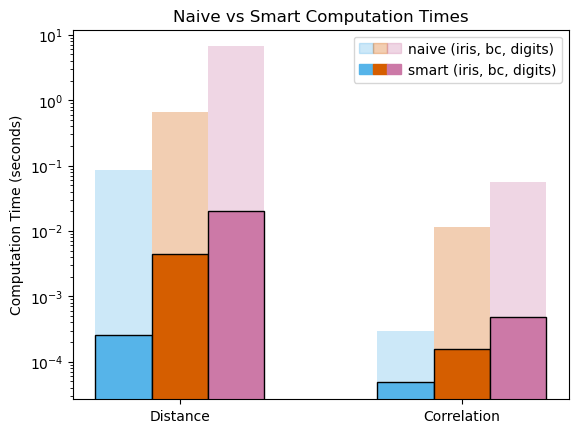

In [21]:
# plot the results in a bar chart
# Set up the figure and axes
fig, ax = plt.subplots()

# Define the width of the bars
bar_width = 0.2

# create space between distance and correlation bars
x_vals = np.arange(2)

# Color-blind friendly palette (Cyan, Magenta, Yellow)
colors = ['#56B4E9', '#D55E00', '#CC79A7']  # Blue, Orange, and Purple

# Plot the bars for each dataset
# Plot the faded naive bars (dist and corr for all datasets)
for i in range(len(row_labels)):
    ax.bar(x_vals + i * bar_width, results[i, [0, 2]], bar_width, 
           color=colors[i], alpha=0.3, label=row_labels[i] + " naive")

# Overlay the smart bars (dist and corr for all datasets) on top of naive bars
for i in range(len(row_labels)):
    ax.bar(x_vals + i * bar_width, results[i, [1, 3]], bar_width, 
           color=colors[i], alpha=1.0, label=row_labels[i] + " smart", edgecolor='black')

# Create custom legend entries
n1 = mpatches.Patch(color='#56B4E9', alpha=0.3)
n2 = mpatches.Patch(color='#D55E00', alpha=0.3)
n3 = mpatches.Patch(color='#CC79A7', alpha=0.3)

s1 = mpatches.Patch(color='#56B4E9', alpha=1.0)
s2 = mpatches.Patch(color='#D55E00', alpha=1.0)
s3 = mpatches.Patch(color='#CC79A7', alpha=1.0)

# Add some spacing between naive and correlation groups
ax.set_xticks(x_vals + bar_width)
ax.set_xticklabels(['Distance', 'Correlation'])

# Add labels, title, and legend
# ax.set_xlabel('Matrix Type')
ax.set_ylabel('Computation Time (seconds)')
ax.set_title('Naive vs Smart Computation Times')
ax.set_yscale('log')
ax.legend(handles=[n1, s1, n2, s2, n3, s3],
          labels=['','','','','naive (iris, bc, digits)', 'smart (iris, bc, digits)'],
          ncol=3, handletextpad=0.5, handlelength=1.0, columnspacing=-0.5 )

# save and show the plot
plt.savefig('naive_vs_smart_bar.png')
plt.show()